Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Reading the dataset

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Checking for NULL Values

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Checking for duplicates

In [6]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


Visulizations

House Pricing Visulizations

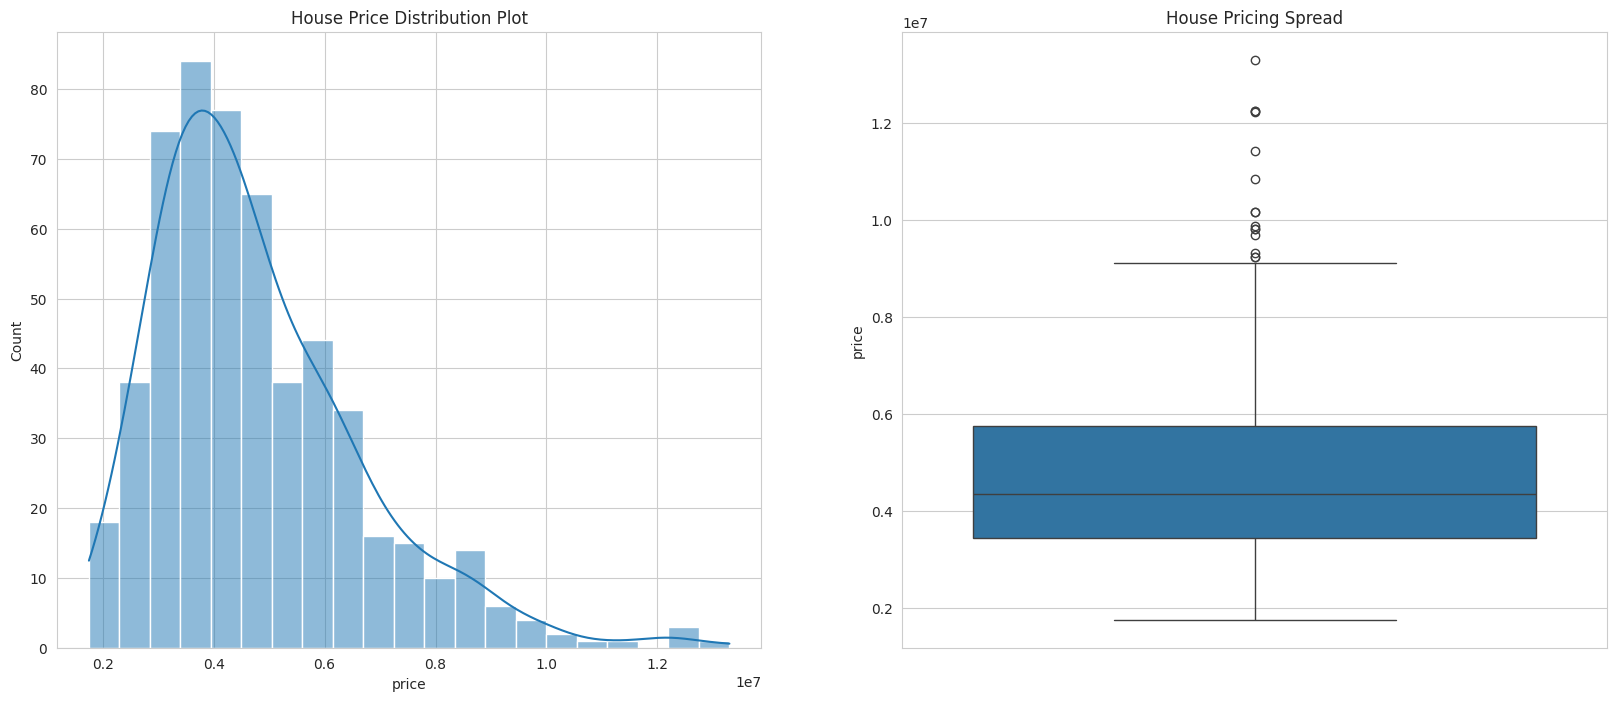

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.histplot(df.price,kde=True)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

Histograms

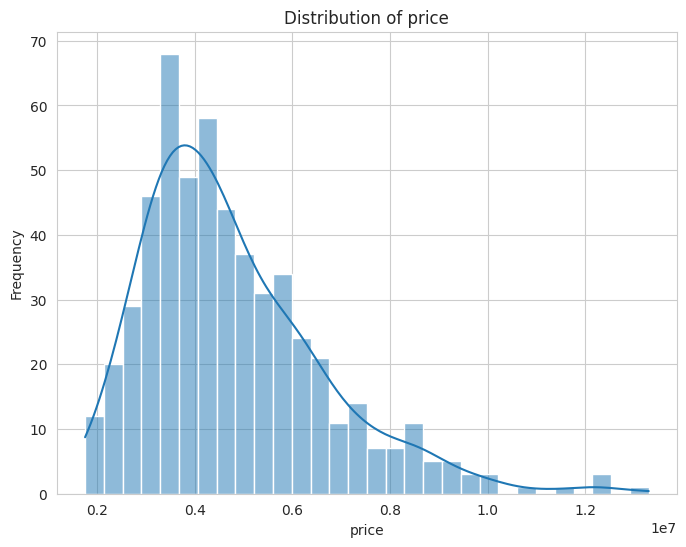

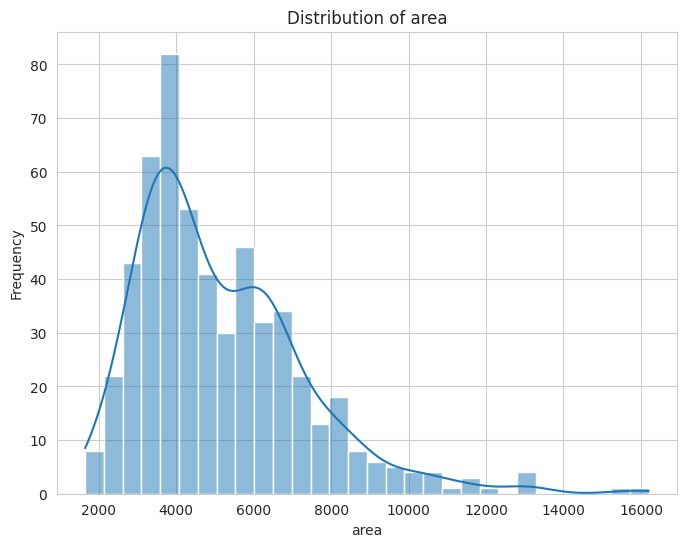

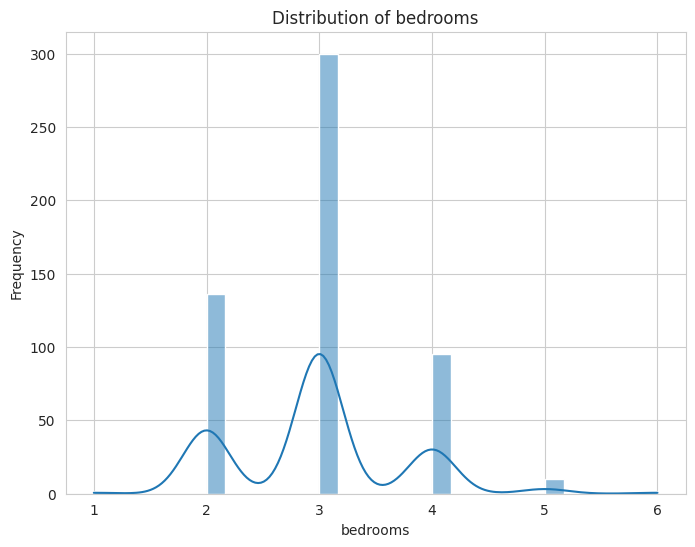

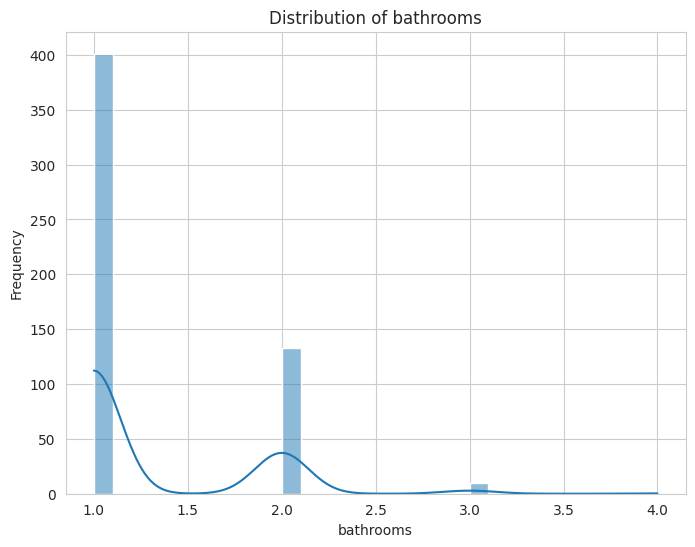

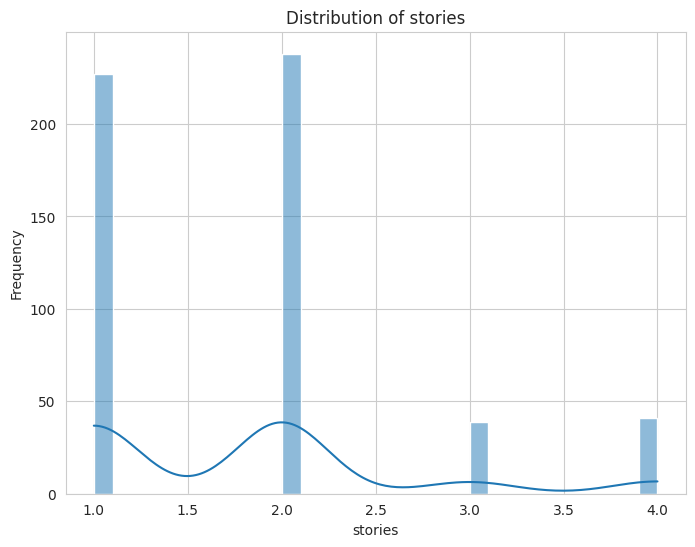

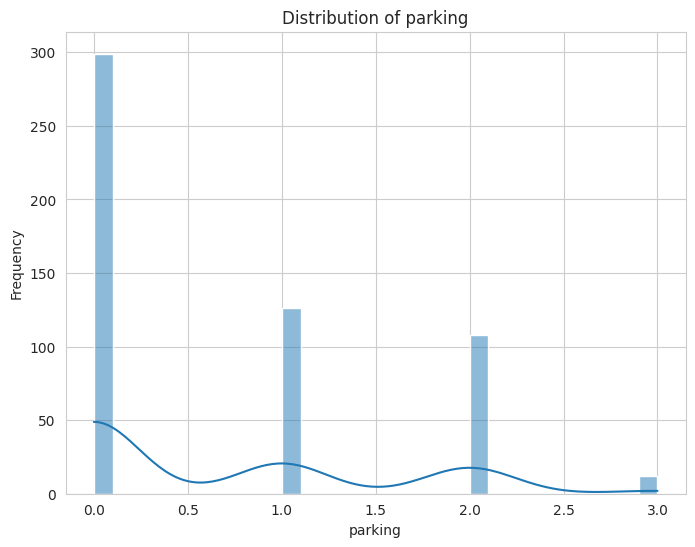

In [8]:
# Histogram for numerical features
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


**Pair plots** to visualize relationships between numerical features.

<Figure size 1200x1000 with 0 Axes>

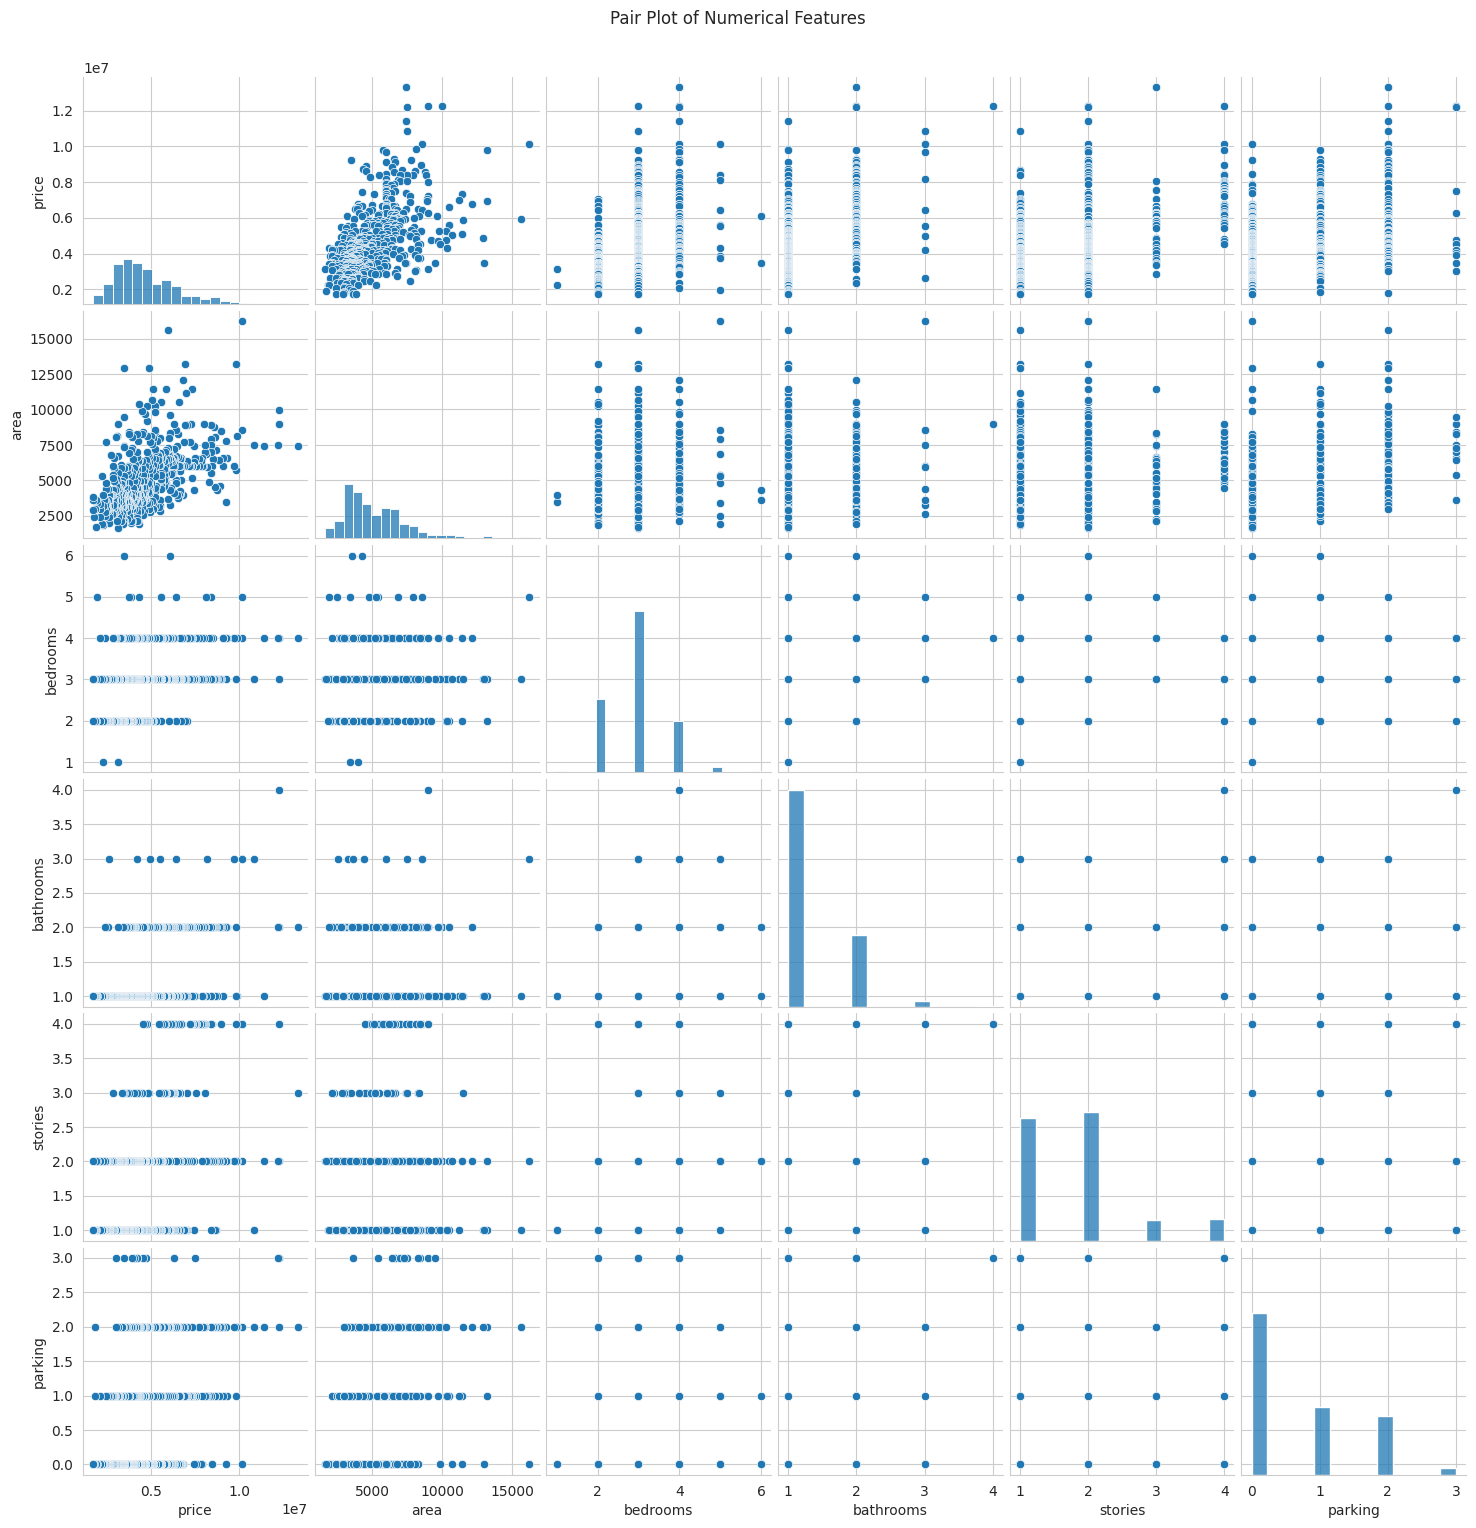

In [9]:
# Pair plot for all numerical features
plt.figure(figsize=(12, 10))
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

**Box plots** to detect outliers in numerical features

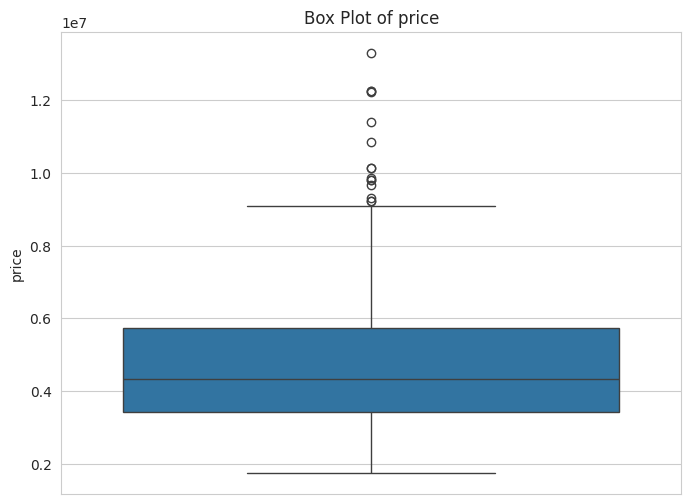

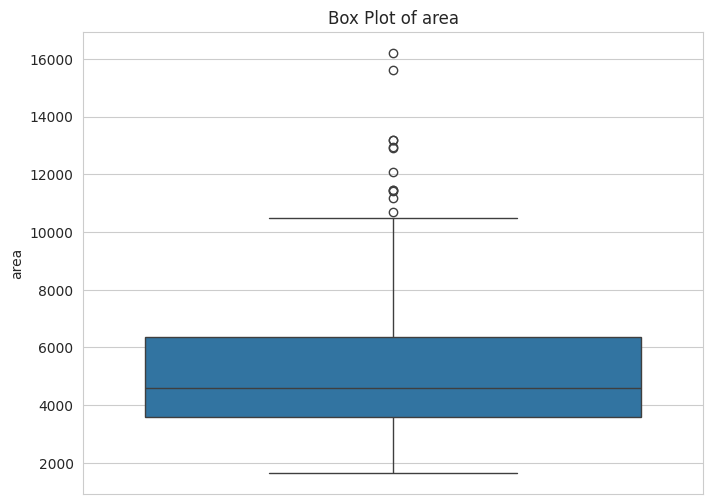

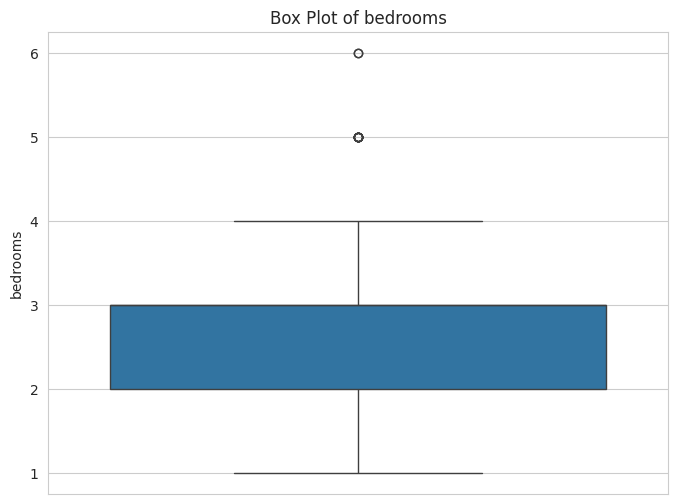

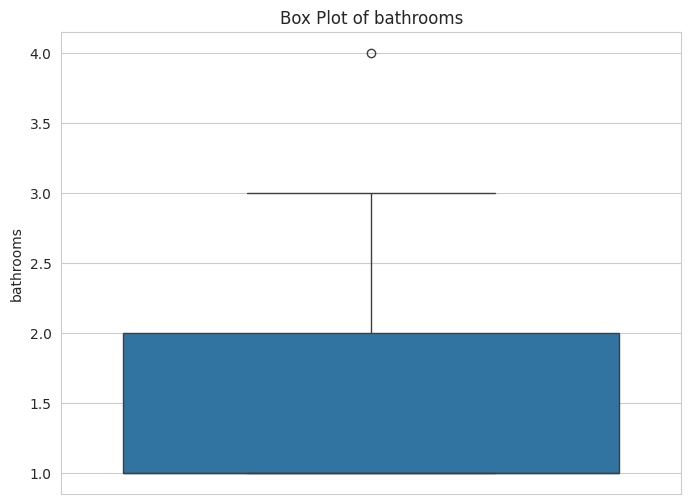

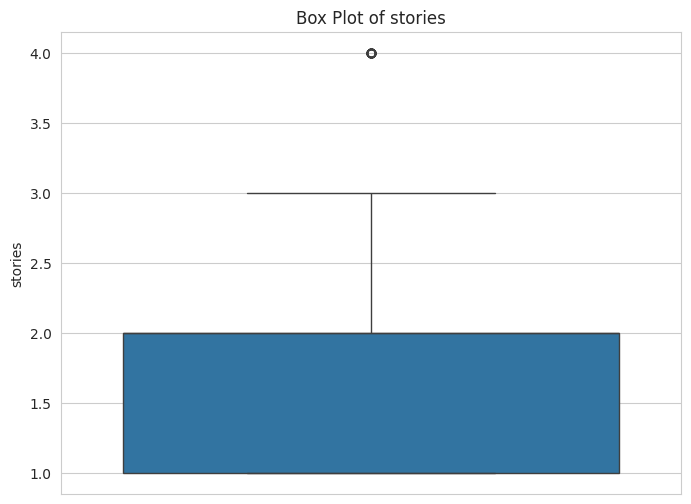

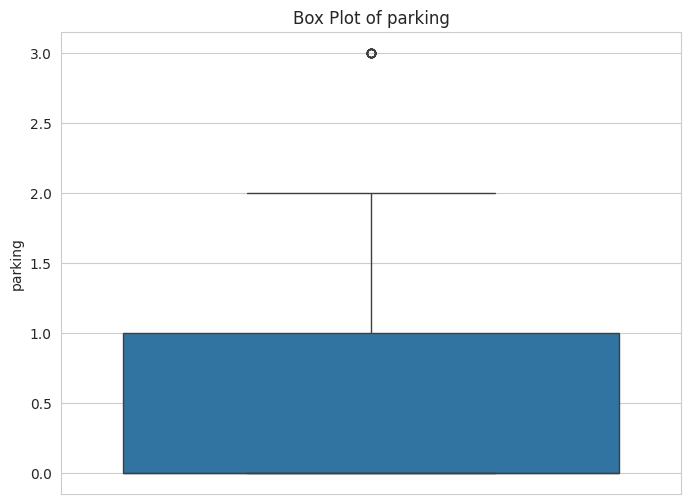

In [10]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()


**Count plots** for categorical features to see the distribution of categories.

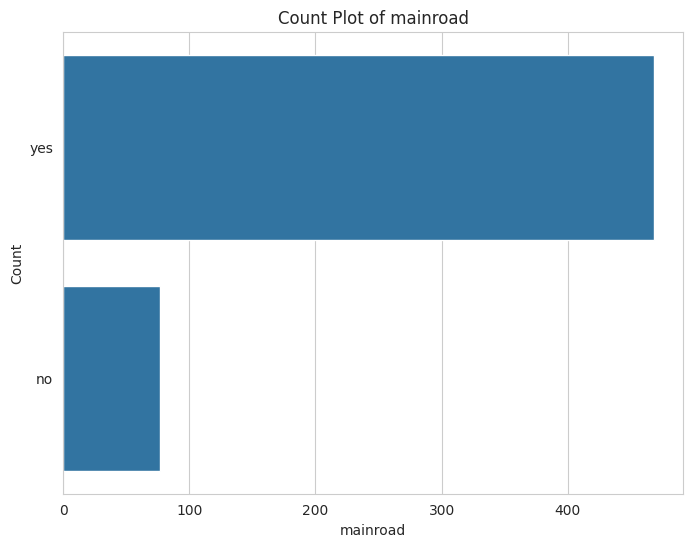

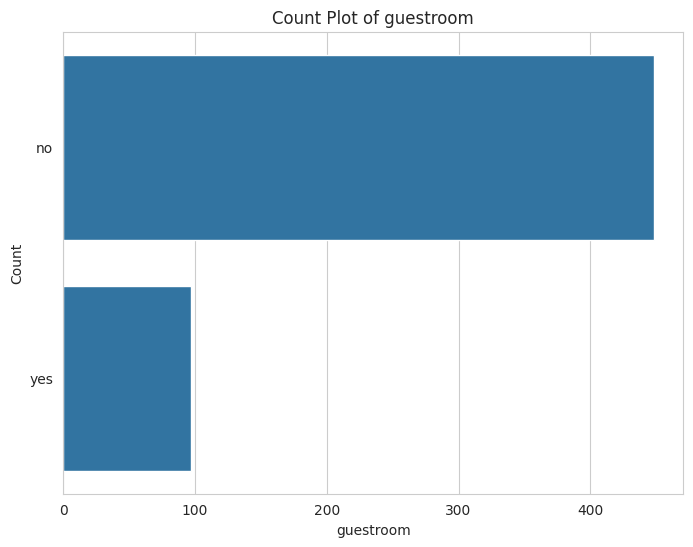

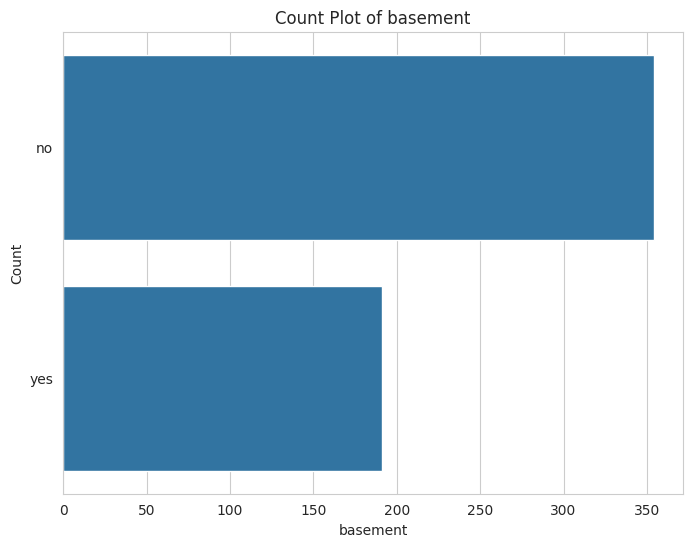

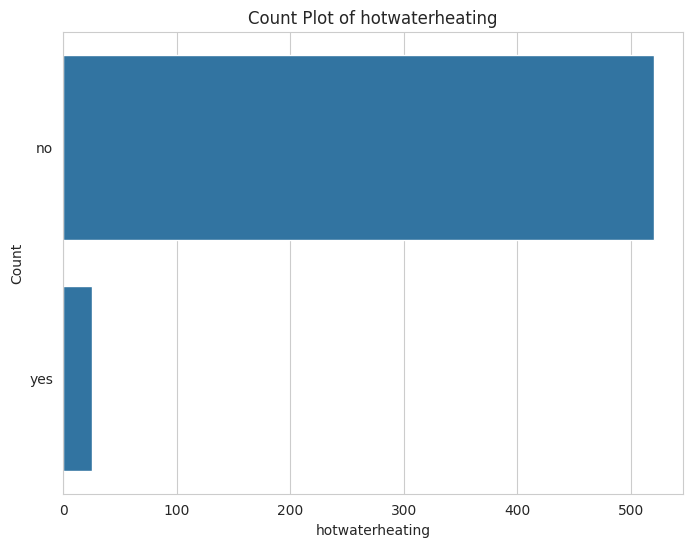

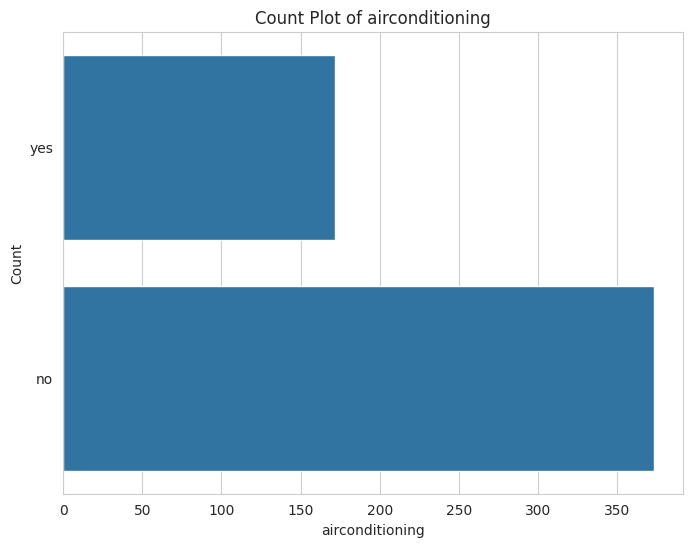

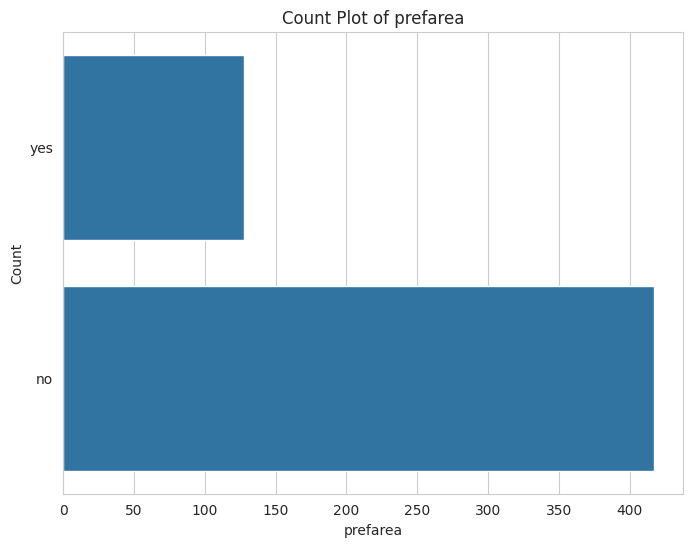

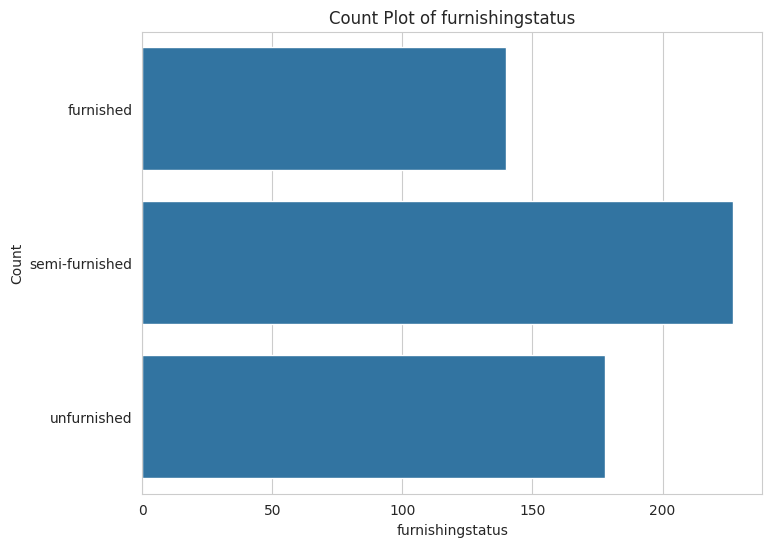

In [11]:
# Count plot for categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(df[feature])
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

**Box plots of price against each categorical feature** to understand the relationship between categorical features and the target variable

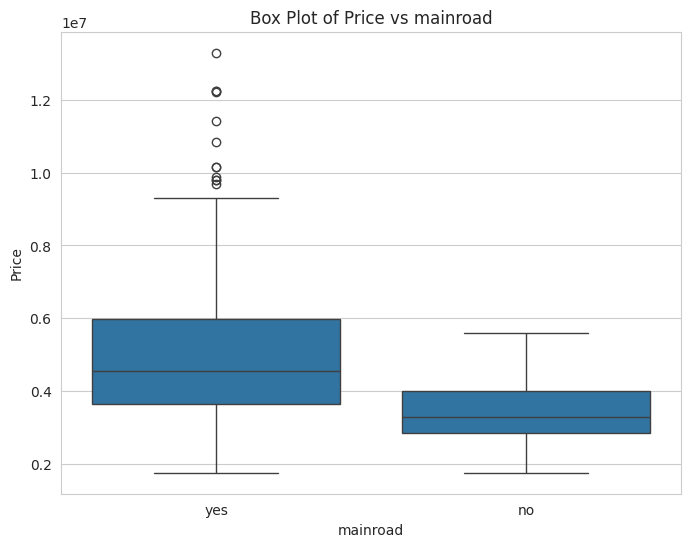

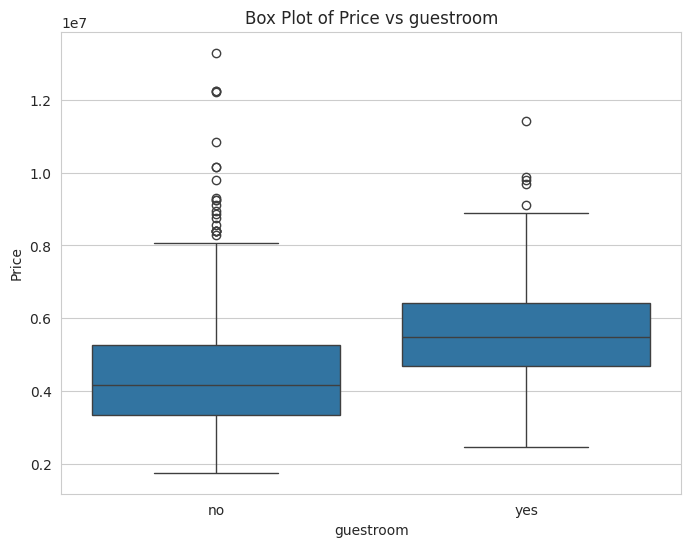

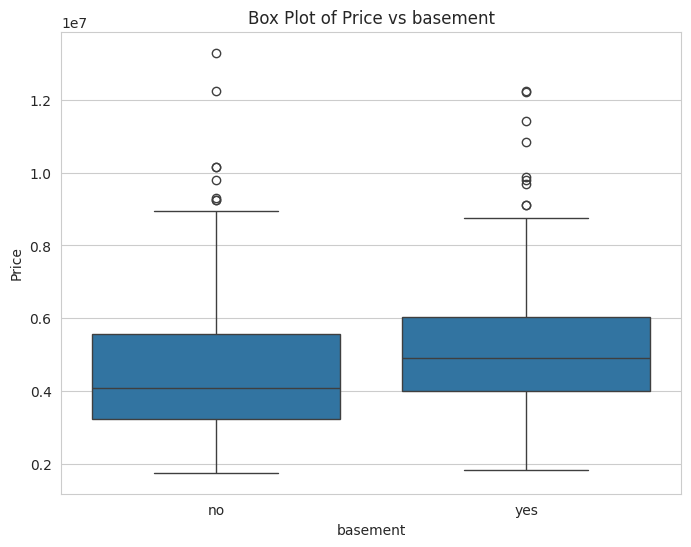

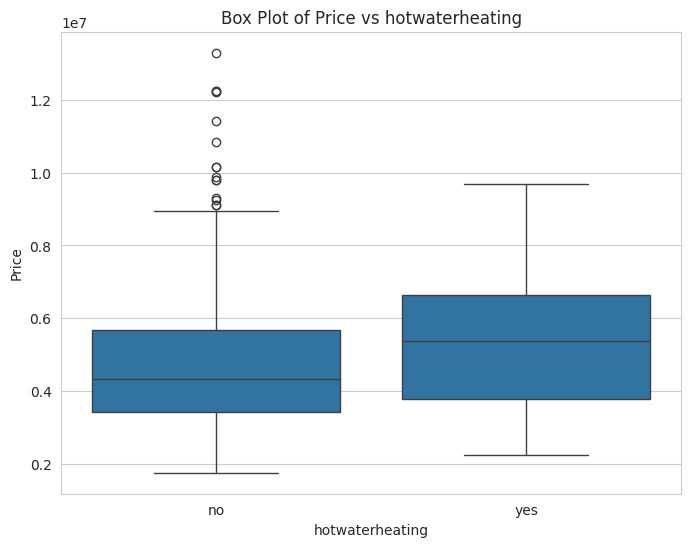

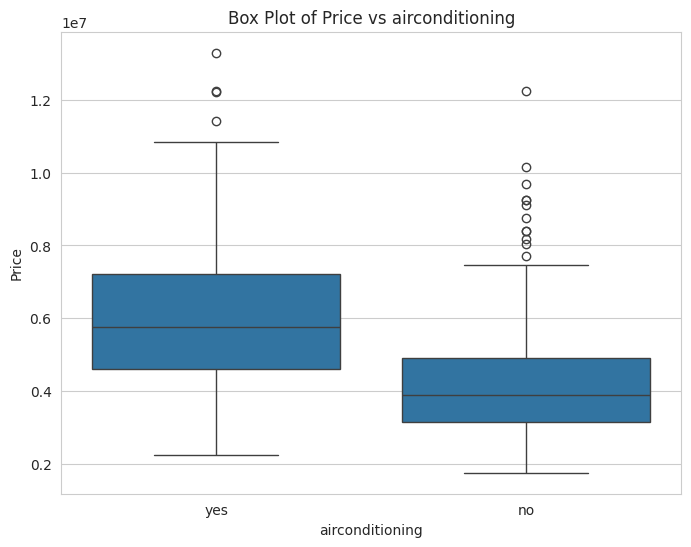

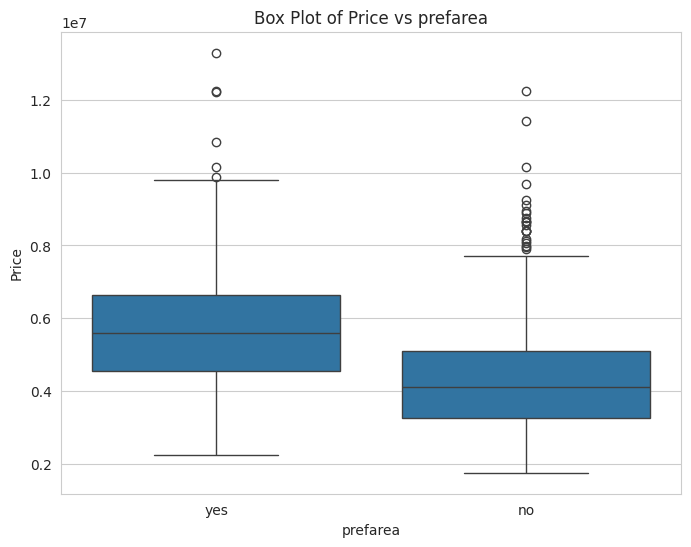

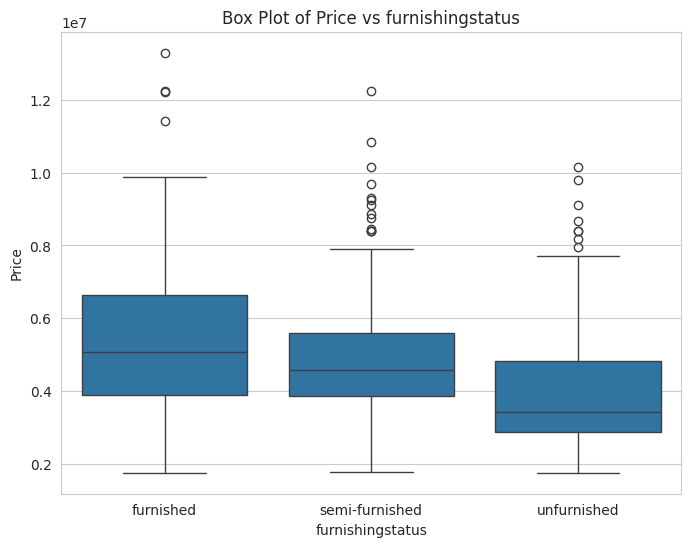

In [12]:
# Box plot for price vs categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], y=df['price'])
    plt.title(f'Box Plot of Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()


**Scatter plots of price against numerical features** to see how the target variable is related to numerical features.

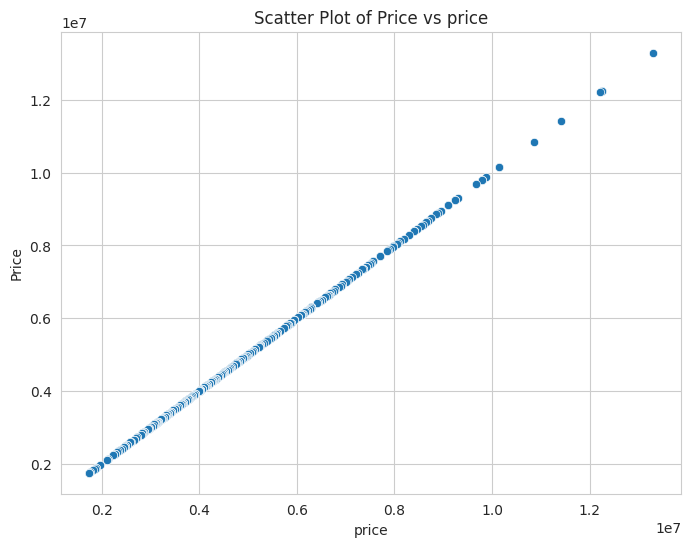

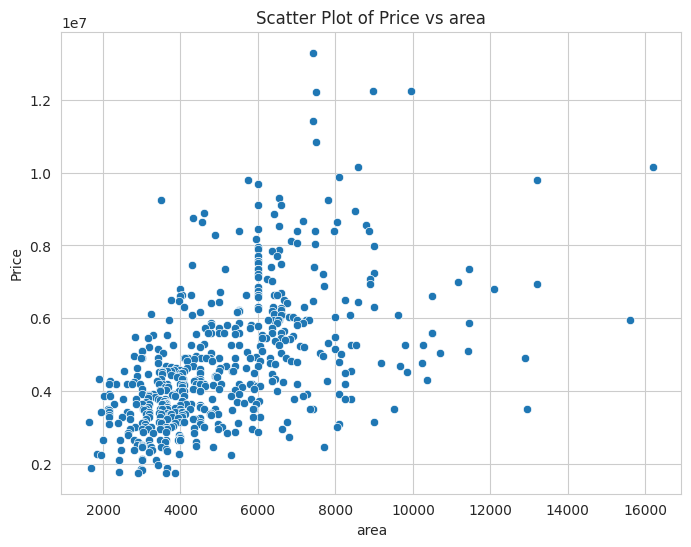

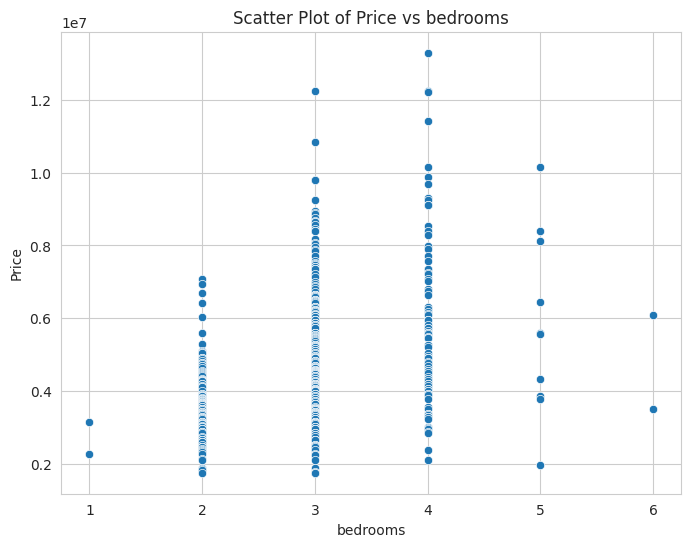

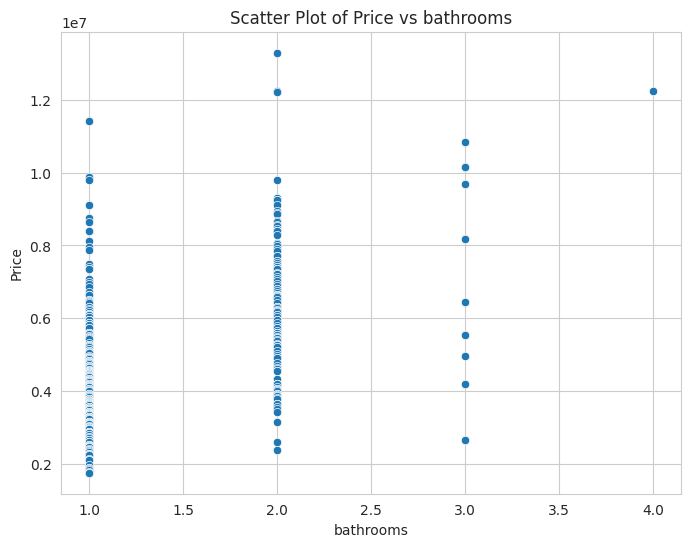

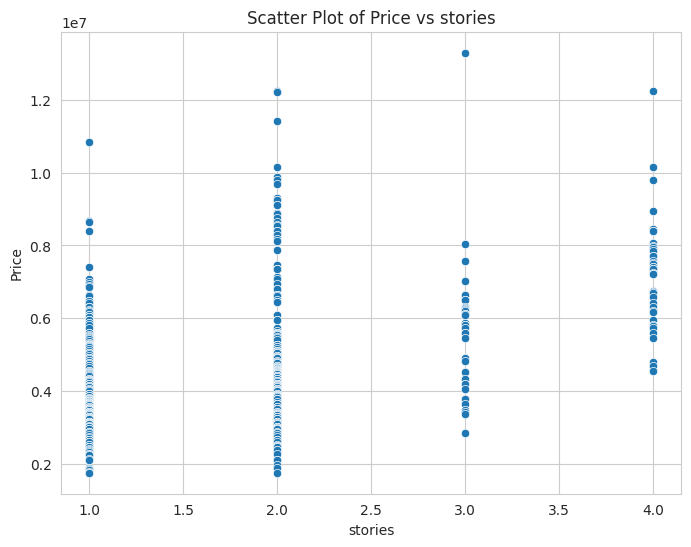

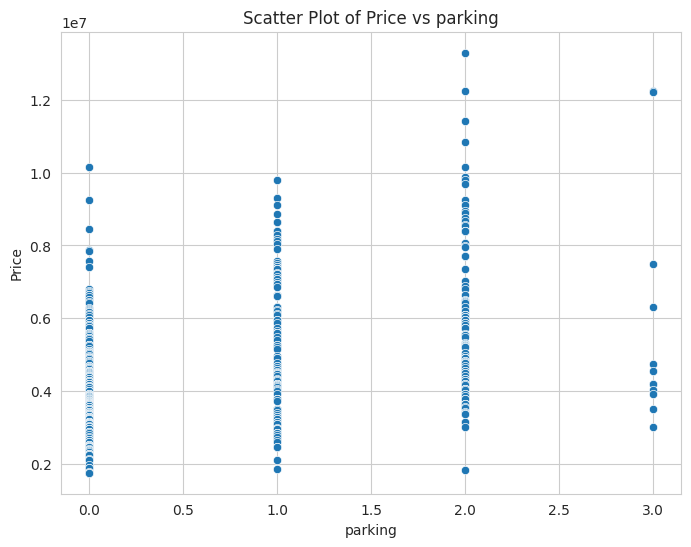

In [13]:
# Scatter plot for price vs numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'Scatter Plot of Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

**Correlation heatmap** to see the correlations between numerical features

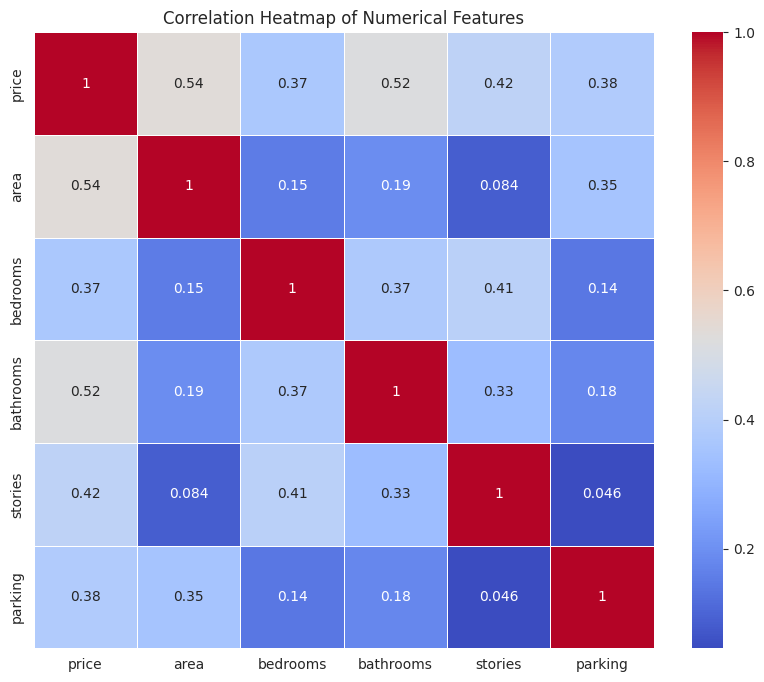

In [14]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Using Models for Prediction

In [15]:
# Define the target variable and features
X = df.drop(columns=['price'])
y = df['price']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64']).columns.tolist()

In [16]:
# Create a preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OrdinalEncoder(), categorical_features)
    ])

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Define a function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return {
        'R2 Score': r2,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse
    }


In [19]:
# Create a pipeline with the preprocessor and Linear Regression model
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Evaluate Linear Regression
linreg_metrics = evaluate_model(linreg_pipeline, X_train, y_train, X_test, y_test)

# Decision Tree Regressor
dtr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define the parameter grid for Decision Tree Regressor
dtr_param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 10, 20],
    'regressor__min_samples_leaf': [1, 5, 10]
}

# Apply GridSearchCV for Decision Tree Regressor
dtr_grid_search = GridSearchCV(dtr_pipeline, dtr_param_grid, cv=5, scoring='r2')
dtr_grid_search.fit(X_train, y_train)
dtr_best_model = dtr_grid_search.best_estimator_
dtr_metrics = evaluate_model(dtr_best_model, X_train, y_train, X_test, y_test)

# Random Forest Regressor
rfr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the parameter grid for Random Forest Regressor
rfr_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 10],
    'regressor__min_samples_leaf': [1, 5]
}

# Apply GridSearchCV for Random Forest Regressor
rfr_grid_search = GridSearchCV(rfr_pipeline, rfr_param_grid, cv=5, scoring='r2')
rfr_grid_search.fit(X_train, y_train)
rfr_best_model = rfr_grid_search.best_estimator_
rfr_metrics = evaluate_model(rfr_best_model, X_train, y_train, X_test, y_test)

# Gradient Boosting Regressor
gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define the parameter grid for Gradient Boosting Regressor
gbr_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

# Apply GridSearchCV for Gradient Boosting Regressor
gbr_grid_search = GridSearchCV(gbr_pipeline, gbr_param_grid, cv=5, scoring='r2')
gbr_grid_search.fit(X_train, y_train)
gbr_best_model = gbr_grid_search.best_estimator_
gbr_metrics = evaluate_model(gbr_best_model, X_train, y_train, X_test, y_test)

# Support Vector Machine Regressor
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Define the parameter grid for Support Vector Machine Regressor
svr_param_grid = {
    'regressor__kernel': ['linear', 'poly', 'rbf'],
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.01, 0.1, 0.2]
}

# Apply GridSearchCV for Support Vector Machine Regressor
svr_grid_search = GridSearchCV(svr_pipeline, svr_param_grid, cv=5, scoring='r2')
svr_grid_search.fit(X_train, y_train)
svr_best_model = svr_grid_search.best_estimator_
svr_metrics = evaluate_model(svr_best_model, X_train, y_train, X_test, y_test)


In [23]:
# Compile results into a DataFrame
results = {
    'Linear Regression': linreg_metrics,
    'Decision Tree Regressor': dtr_metrics,
    'Random Forest Regressor': rfr_metrics,
    'Gradient Boosting Regressor': gbr_metrics,
    'Support Vector Machine Regressor': svr_metrics
}

# Convert results into DataFrame
results_df = pd.DataFrame(results)

# Display results DataFrame
print("Evaluation Metrics for each model:")
results_df.transpose()


Evaluation Metrics for each model:


,R2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
Linear Regression,0.649475,1.771751e+12,9.796797e+05,1.331071e+06
Decision Tree Regressor,0.450268,2.778658e+12,1.268396e+06,1.666931e+06
Random Forest Regressor,0.588244,2.081251e+12,1.047745e+06,1.442654e+06
Gradient Boosting Regressor,0.665168,1.692432e+12,9.631875e+05,1.300935e+06
Support Vector Machine Regressor,0.243556,3.823498e+12,1.474439e+06,1.955377e+06
